In [1]:
from pyforest import *

In [2]:
lazy_imports()

['import statistics',
 'from PIL import Image',
 'from xlrd import open_workbook',
 'import os',
 'import datetime as dt',
 'from sklearn import svm',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.linear_model import ElasticNetCV',
 'import tensorflow as tf',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import fastai',
 'from sklearn.model_selection import train_test_split',
 'import pandas as pd',
 'from sklearn.linear_model import LogisticRegression',
 'import plotly.graph_objs as go',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.linear_model import Ridge',
 'from fbprophet import Prophet',
 'from sklearn.preprocessing import LabelEncoder',
 'import gensim',
 'import textblob',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn import metrics',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.decomposition import PCA',
 'import altair as alt',
 'from sklearn.pr

In [3]:
df_train = pd.read_csv('../../dataset/bigmart_train.csv')
df_test = pd.read_csv('../../dataset/bigmart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df_train['source'] = 'train'
df_test['source'] = 'test'

df = pd.concat([df_train, df_test], ignore_index=True)

<IPython.core.display.Javascript object>

In [10]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [11]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

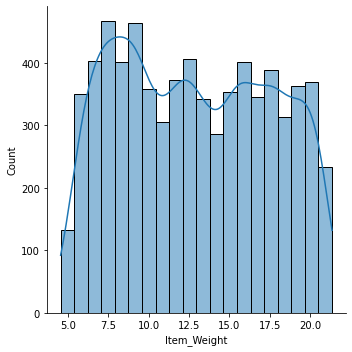

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

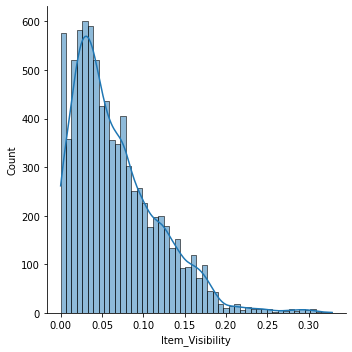

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

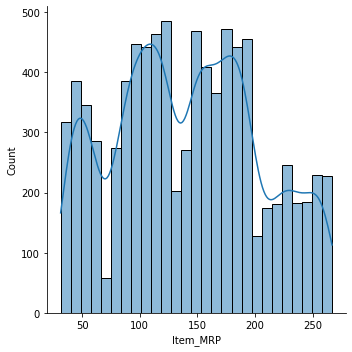

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

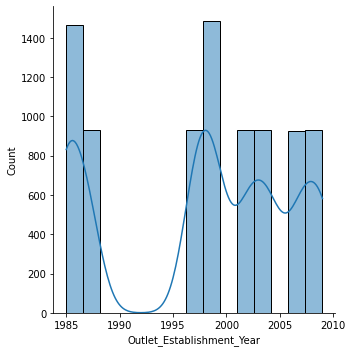

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

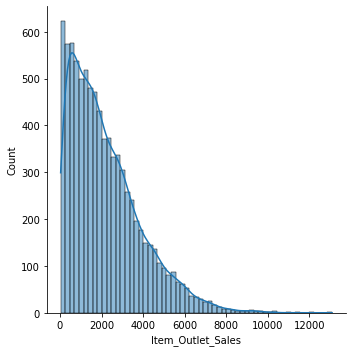

In [12]:
for i in df_train.describe().columns:
    sns.displot(df_train[i].dropna(), kde=True)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

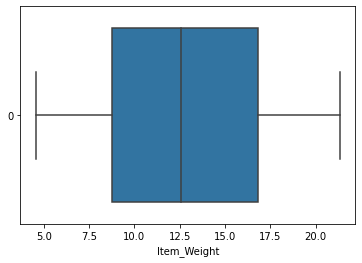

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

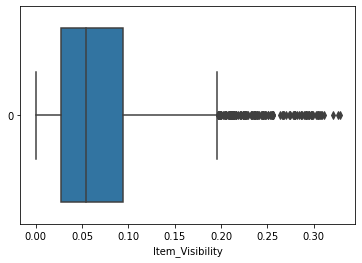

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

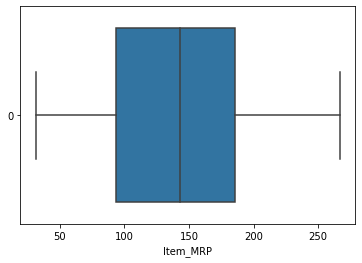

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

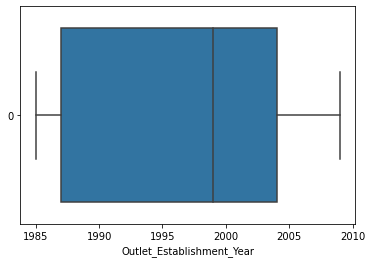

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

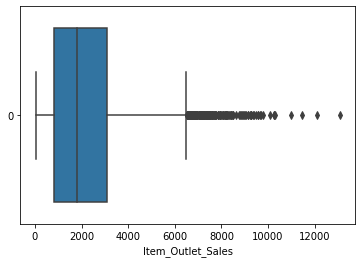

In [13]:
for i in df_train.describe().columns:
    sns.boxplot(df_train[i].dropna(), orient="h")
    plt.xlabel(df_train[i].name)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

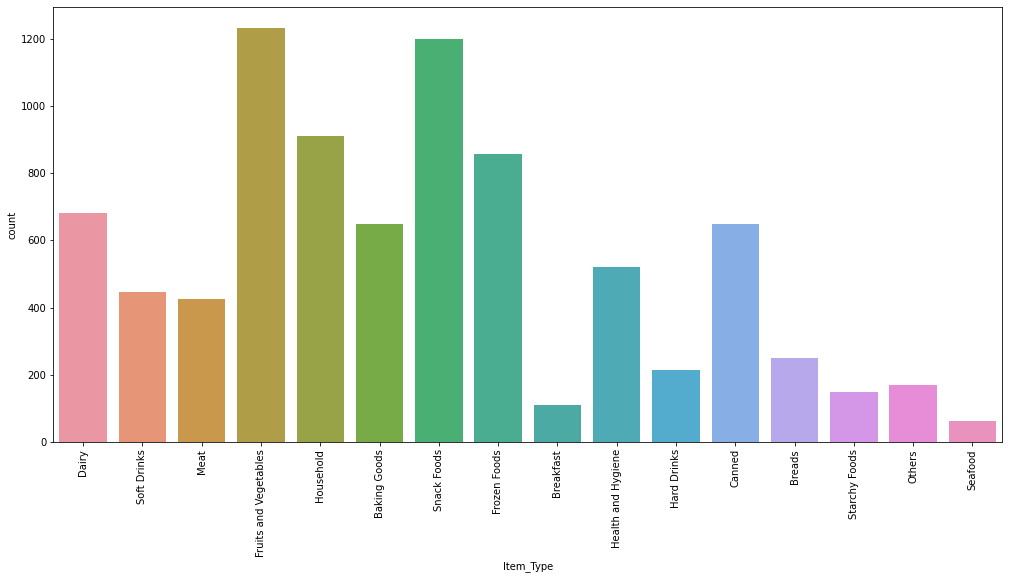

In [14]:
plt.figure(figsize=(17, 8))
sns.countplot(x=df_train['Item_Type'])
plt.xticks(rotation=90)
plt.show()

In [15]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

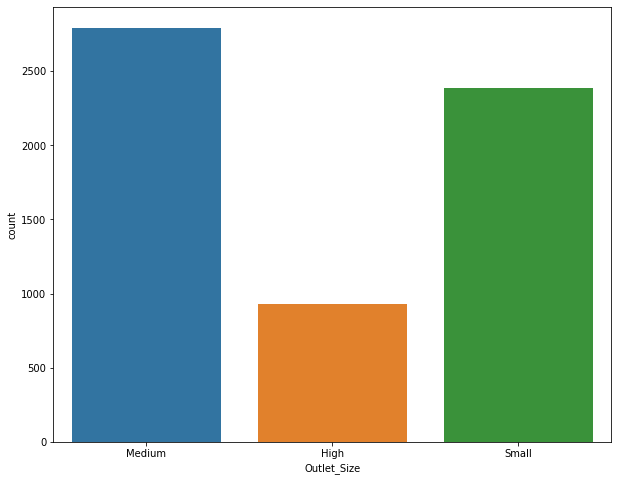

In [16]:
plt.figure(figsize=(10, 8))
sns.countplot(x=df_train['Outlet_Size'])
plt.show()

In [17]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

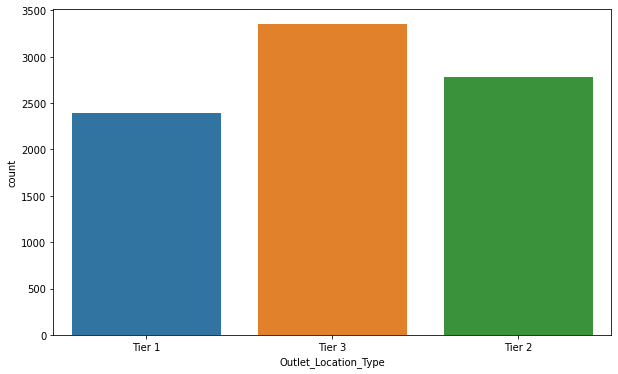

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df_train['Outlet_Location_Type'])
plt.show()

In [19]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

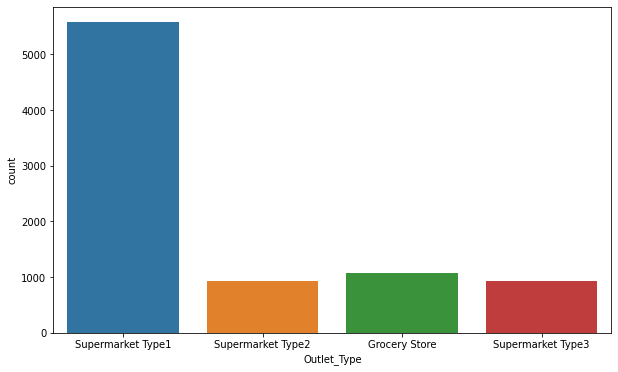

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df_train['Outlet_Type'])
plt.show()

In [21]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

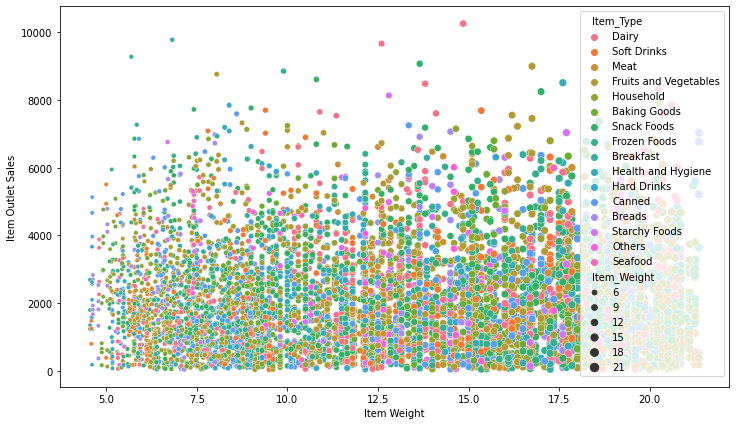

In [22]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', hue='Item_Type', size='Item_Weight', data=df_train)
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

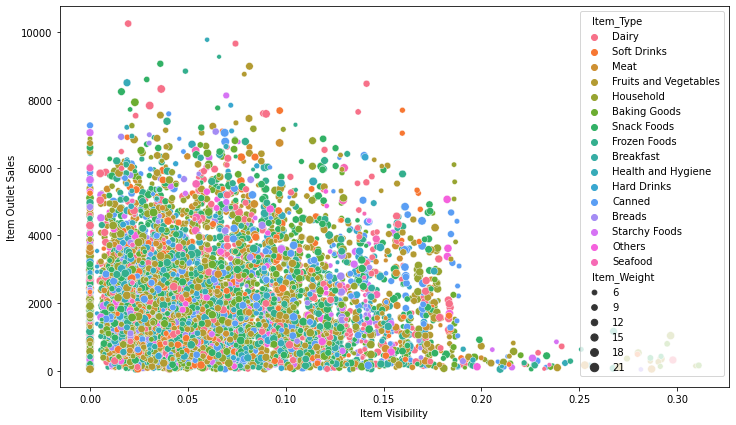

In [23]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Type', size='Item_Weight', data=df_train)
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

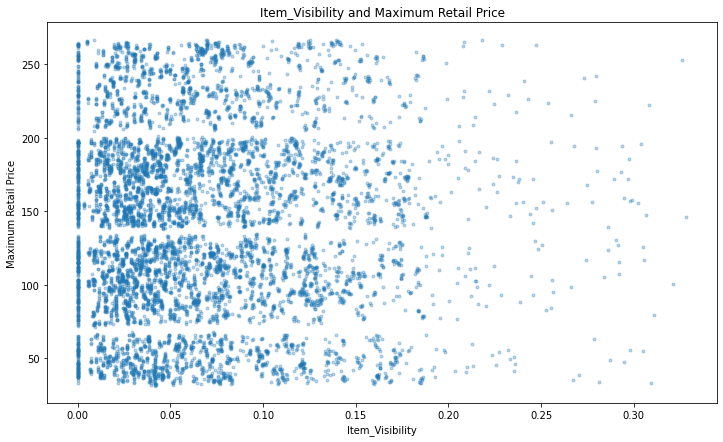

In [24]:
plt.figure(figsize=(12, 7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(df_train['Item_Visibility'], df_train['Item_MRP'], '.', alpha=0.3)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

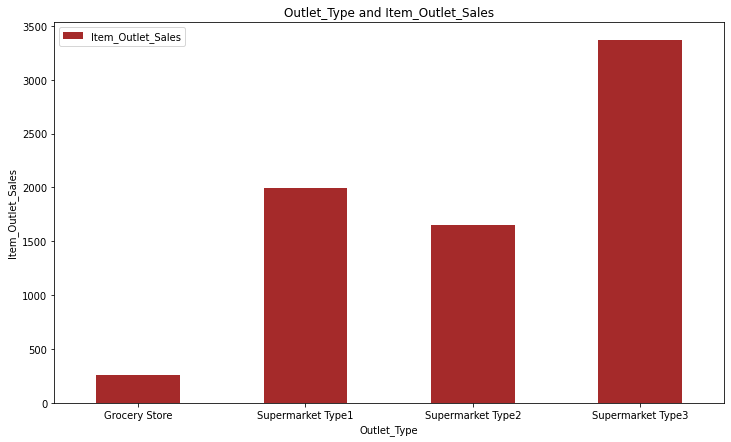

In [25]:
pt = df_train.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median)
pt.plot(kind='bar', color='brown', figsize=(12, 7))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Type and Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

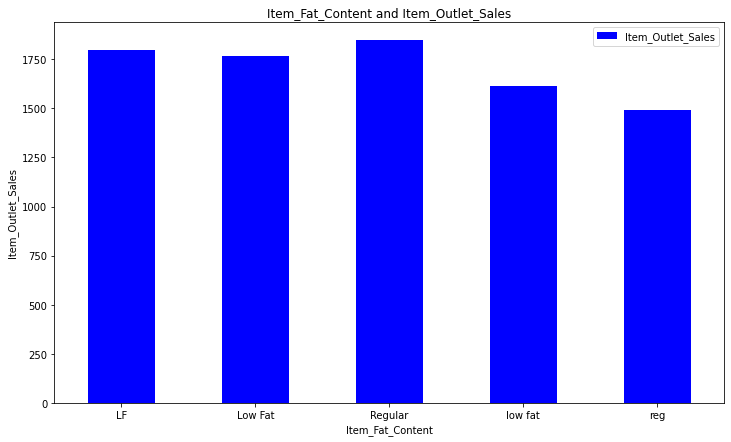

In [26]:
pt = df_train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)
pt.plot(kind='bar', color='b', figsize=(12, 7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Fat_Content and Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [27]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [29]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

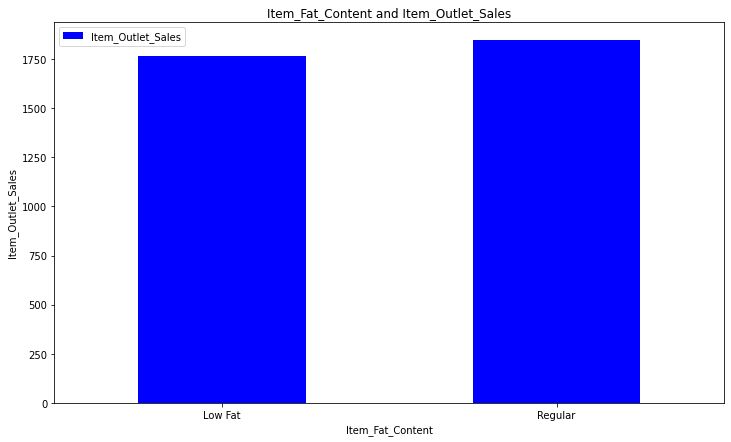

In [31]:
pt = df_train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)
pt.plot(kind='bar', color='b', figsize=(12, 7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Fat_Content and Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [32]:
df_train.corr(numeric_only=True)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

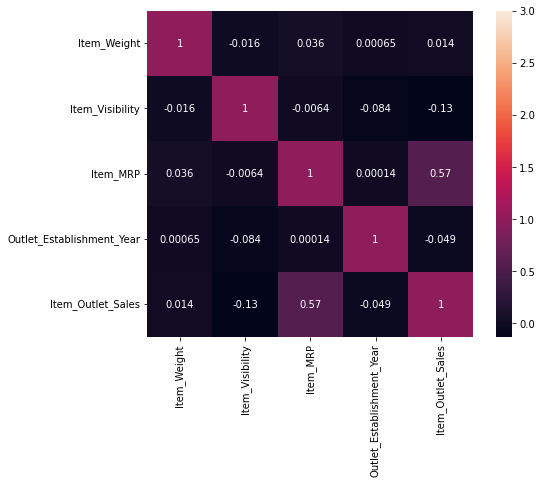

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), vmax=3, annot=True, square=True)
plt.show()

In [34]:
df['Item_Weight'].mean()

12.792854228644284

In [35]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [36]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [37]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [38]:
df['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [39]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [40]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [41]:
df['Outler_Year'] = 2009 - df['Outlet_Establishment_Year']

In [42]:
df['Outler_Year'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outler_Year, dtype: float64

In [43]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [44]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [45]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

In [46]:
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [47]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [48]:
df.loc[df['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

In [49]:
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [50]:
item_vis_avg = df.pivot_table(index='Item_Identifier', values='Item_Visibility')
item_vis_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [51]:
function = lambda x: x['Item_Visibility'] / item_vis_avg['Item_Visibility'][item_vis_avg.index == x['Item_Identifier']][0]
df['Item_Visibility_Avg'] = df.apply(function, axis=1).astype(float)

In [52]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
var = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'New_Item_Type', 'Outlet_Type', 'Outlet']
for i in var:
    df[i] = label.fit_transform(df[i])

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outler_Year,New_Item_Type,Item_Visibility_Avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,0.000000,1


In [54]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'New_Item_Type', 'Outlet'])
df

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outler_Year,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,22,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,NaN,test,12,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,NaN,test,0,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,test,7,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.000000,Canned,214.6218,OUT017,2007,NaN,test,2,...,0,0,1,0,0,0,0,0,0,0


In [55]:
df.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [56]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [57]:
train.drop(['source'], axis=1, inplace=True)
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_54088\460647460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'], axis=1, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_54088\460647460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)


In [58]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outler_Year,Item_Visibility_Avg,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,10,0.931078,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0.933420,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,10,0.960069,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,11,0.000000,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,22,0.000000,0,1,...,0,1,0,0,0,0,0,0,0,0


In [59]:
X_train = train.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1)
y_train = train['Item_Outlet_Sales']

In [61]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outler_Year,Item_Visibility_Avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,20.750000,0.007565,107.8622,OUT049,10,1.029192,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,8.300000,0.038428,87.3198,OUT017,2,1.130311,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,14.600000,0.099575,241.7538,OUT010,11,1.735215,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,7.315000,0.015388,155.0340,OUT017,2,1.291577,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,12.792854,0.118599,234.2300,OUT027,24,0.917824,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [63]:
X_test = test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [64]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [65]:
lr_pred = lr_model.predict(X_test)
lr_model.score(X_train, y_train)

0.5635233410503867

In [66]:
from sklearn.preprocessing import StandardScaler

scaled_x = StandardScaler().fit_transform(X_train)
lr_model = LinearRegression()
lr_model.fit(scaled_x, y_train)

LinearRegression()

In [67]:
lr_model.score(scaled_x, y_train)

0.5634474511916587

In [86]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=10)

In [87]:
tree.score(X_train, y_train)

0.7063389704810612

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=400, max_depth=15)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=400)

In [91]:
rf_model.score(X_train, y_train)

0.8581349258386378

In [92]:
from xgboost import XGBRegressor 

xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [93]:
xg_model.score(X_train, y_train)

0.8383749842027666

In [94]:
from sklearn.linear_model import Ridge

rd_model = Ridge()
rd_model.fit(X_train, y_train)

Ridge()

In [95]:
rd_model.score(X_train, y_train)

0.5635231023915819

In [96]:
from sklearn.svm import SVR

sv_model = SVR()
sv_model.fit(X_train, y_train)

SVR()

In [97]:
sv_model.score(X_train, y_train)

0.20883690319266857

In [98]:
from sklearn.linear_model import Lasso

ls_model = Lasso()
ls_model.fit(X_train, y_train)

Lasso()

In [99]:
ls_model.score(X_train, y_train)

0.5634367493418219

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

gdr_model = GradientBoostingRegressor()
gdr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [101]:
gdr_model.score(X_train, y_train)

0.632095403170059